In [1]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

f = plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()

plt.show()

ImportError: No module named cartopy.crs

In [3]:
import matplotlib.pyplot as plt
import numpy as np

try:
    from mpl_toolkits.basemap import Basemap
    have_basemap = True
except ImportError:
    have_basemap = False


def plotmap():
    # create figure
    fig = plt.figure(figsize=(8,8))
    # set up orthographic map projection with
    # perspective of satellite looking down at 50N, 100W.
    # use low resolution coastlines.
    map = Basemap(projection='ortho',lat_0=50,lon_0=-100,resolution='l')
    # lat/lon coordinates of five cities.
    lats=[40.02,32.73,38.55,48.25,17.29]
    lons=[-105.16,-117.16,-77.00,-114.21,-88.10]
    cities=['Boulder, CO','San Diego, CA',
            'Washington, DC','Whitefish, MT','Belize City, Belize']
    # compute the native map projection coordinates for cities.
    xc,yc = map(lons,lats)
    # make up some data on a regular lat/lon grid.
    nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
    lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
    lons = (delta*np.indices((nlats,nlons))[1,:,:])
    wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
    mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
    # compute native map projection coordinates of lat/lon grid.
    # (convert lons and lats to degrees first)
    x, y = map(lons*180./np.pi, lats*180./np.pi)
    # draw map boundary
    map.drawmapboundary(color="0.9")
    # draw graticule (latitude and longitude grid lines)
    map.drawmeridians(np.arange(0,360,30),color="0.9")
    map.drawparallels(np.arange(-90,90,30),color="0.9")
    # plot filled circles at the locations of the cities.
    map.plot(xc,yc,'wo')
    # plot the names of five cities.
    for name,xpt,ypt in zip(cities,xc,yc):
        plt.text(xpt+100000,ypt+100000,name,fontsize=9,color='w')
    # contour data over the map.
    cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
    # draw blue marble image in background.
    # (downsample the image by 50% for speed)
    map.bluemarble(scale=0.5)

def plotempty():
    # create figure
    fig = plt.figure(figsize=(8,8))
    fig.text(0.5, 0.5, "Sorry, could not import Basemap",
                                horizontalalignment='center')

if have_basemap:
    plotmap()
else:
    plotempty()
plt.show()

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines(resolution='110m')
ax.gridlines()

ImportError: No module named cartopy.crs

In [10]:
%timeit for i in xrange(1000000): i = i

100 loops, best of 3: 17.4 ms per loop


In [2]:
%%writefile ex1.py

PI = 3.1416

def sum(lst):
    tot = lst[0]
    for value in lst[1:]:
        tot = tot + value
    return tot
    
w = [0, 1, 2, 3]
print sum(w), PI


Writing ex1.py


In [3]:
%run ex1.py

6 3.1416


In [7]:
import ex1
ex1.sum([0,1,2,3])
ex1.PI
ex1.w

ImportError: No module named ex1

In [6]:
import os
os.remove('ex1.py')

In [5]:
%%writefile ex2.py

PI = 3.1416

def sum(lst):
    """ Sum the values in a list
    """
    tot = 0
    for value in lst:
        tot = tot + value
    return tot

def add(x, y):
    " Add two values."
    a = x + y
    return a

def test():
    w = [0,1,2,3]
    assert(sum(w) == 6)
    print 'test passed.'
    
if __name__ == '__main__':
    test()

Overwriting ex2.py


In [45]:
%run ex2.py

test passed.


In [46]:
%%writefile test.txt
this is a test file.
hello world!
python is good!
today is a good day.

Writing test.txt


$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)\,P(A)}{P(B)} $$

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)\,P(A)}{P(B)} $$

$$ P(A \mid B) = \frac{P(B \mid A) P(A)P(A)}{\frac{P(B)}{P(B)}} $$

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

In [51]:
f = open('test.txt')
lines = f.readlines()
print lines
f.close()

['this is a test file.\n', 'hello world!\n', 'python is good!\n', 'today is a good day.']


In [90]:
f = open('myfile.txt', 'w')
f.write('hello world!')
f.close()

In [112]:
f = open('myfile.txt', 'a')
f.write('\n... and more')
f.close()
print open('myfile.txt').read()

hello world!
... and more
... and more
... and more
... and more
... and more
... and more
... and more
... and more
... and more
... and more


In [120]:
f = open('myfile.txt', 'r')
f.seek(13)
print f.read()
f.close()


... and more
... and more
... and more
... and more
... and more
... and more
... and more
... and more
... and more
... and more


In [123]:
f = open('newfile.txt','w')
try:
    for i in range(3000):
        x = 1.0 / (i - 1000)
        f.write('hello world: ' + str(i) + '\n')
except Exception:
    print "something bad happened"
finally:
    f.close()

something bad happened


In [11]:
with open('newfile.txt','w') as f:
    for i in range(3000):
        x = 1.0 / (i - 1000)
        f.write('hello world: ' + str(i) + '\n')

ZeroDivisionError: float division by zero

In [12]:

%matplotlib inline # %matplotlib inline Jupyter Magic (Jupyter魔法)命令。
x = linspace(0, 2 * pi, 50)
#plot(sin(x))
plot(x, sin(x))
plot(2*x, sin(x), 'r-^') #r 颜色  ^形状
plot(4*x, sin(x), 'b-o')
plot(6*x, sin(x), 'go')
scatter(8*x, sin(x))


UnicodeEncodeError: 'ascii' codec can't encode characters in position 67-68: ordinal not in range(128)

In [1]:
x = rand(200)
y = rand(200)
size = rand(200) * 30
color = rand(200)
scatter(x, y, size, color)
# 显示颜色条
colorbar()

NameError: name 'rand' is not defined

In [2]:
t = linspace(0, 2*pi, 50)
x = sin(t)
y = cos(t)
figure()
plot(y,label='second')
figure()
plot(x,label='first')
legend()


NameError: name 'linspace' is not defined

多幅子图,subplot(arg1,arg2,arg3) 第一个参数和第二个参数代表有多少幅子图，按arg1行，arg2列排序，第三个参数代表这幅图在arg1，arg2子图的位置，顺序为从左到右，从上到下
x = sin(t)
y = cos(t)

In [4]:
subplot(2,1,1)
plot(x)
subplot(3, 2, 5)
plot(y)
subplot(3, 2,6)
plot(tan(t))


NameError: name 'subplot' is not defined

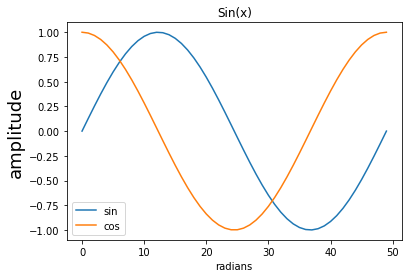

In [222]:
plot(x, label='sin')
xlabel('radians')#横轴
ylabel('amplitude', fontsize=18)
title('Sin(x)')#标题
plot(y, label='cos')
legend()#加图例

图片

In [232]:
import matplotlib.image as mpimg
import matplotlib as plt
img = mpimg.imread('lena.jpg')
img

array([[161, 162, 163, ..., 167, 157, 131],
       [161, 162, 163, ..., 170, 158, 129],
       [162, 163, 163, ..., 168, 156, 124],
       ...,
       [ 43,  47,  50, ..., 104, 104, 102],
       [ 42,  47,  52, ..., 103, 105, 108],
       [ 41,  47,  53, ..., 100, 101, 108]], dtype=uint8)

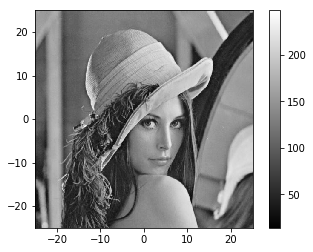

In [250]:
plt.imshow(img,extent = [-25,25,-25,25],cmap = cm.gray)
colorbar()

直方图

(array([  1.,   2.,  22.,  78., 170., 302., 239., 125.,  49.,  12.]),
 array([-4.06599916, -3.35967154, -2.65334392, -1.9470163 , -1.24068869,
        -0.53436107,  0.17196655,  0.87829417,  1.58462179,  2.29094941,
         2.99727703]),
 <a list of 10 Patch objects>)

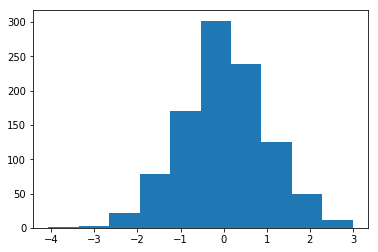

In [252]:
plt.hist(randn(1000))

In [325]:
aa=125
b=25.0
if type(aa/b)!= 'int':
    aa = (aa//b)*b
a = arange(aa)
c=aa/b
a.shape = int(b),int(c)
a

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.],
       [ 25.,  26.,  27.,  28.,  29.],
       [ 30.,  31.,  32.,  33.,  34.],
       [ 35.,  36.,  37.,  38.,  39.],
       [ 40.,  41.,  42.,  43.,  44.],
       [ 45.,  46.,  47.,  48.,  49.],
       [ 50.,  51.,  52.,  53.,  54.],
       [ 55.,  56.,  57.,  58.,  59.],
       [ 60.,  61.,  62.,  63.,  64.],
       [ 65.,  66.,  67.,  68.,  69.],
       [ 70.,  71.,  72.,  73.,  74.],
       [ 75.,  76.,  77.,  78.,  79.],
       [ 80.,  81.,  82.,  83.,  84.],
       [ 85.,  86.,  87.,  88.,  89.],
       [ 90.,  91.,  92.,  93.,  94.],
       [ 95.,  96.,  97.,  98.,  99.],
       [100., 101., 102., 103., 104.],
       [105., 106., 107., 108., 109.],
       [110., 111., 112., 113., 114.],
       [115., 116., 117., 118., 119.],
       [120., 121., 122., 123., 124.]])

In [286]:
a = array([[ 0, 1, 2, 3],
           [10,11,12,13]])
a.shape
a.size
a[1, 3]

13

In [343]:
a = arange(3)
a
y = a[newaxis,newaxis ,:]
print y
y = a[:, newaxis]
y


[[[0 1 2]]]


array([[0],
       [1],
       [2]])

C:\Users\d\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


Text(0.5,0,u'z')

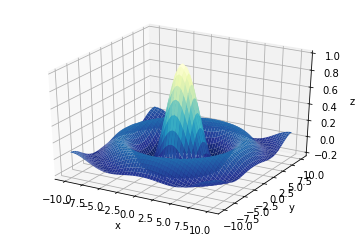

In [347]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

C:\Users\d\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


Text(0.5,0,u'z')

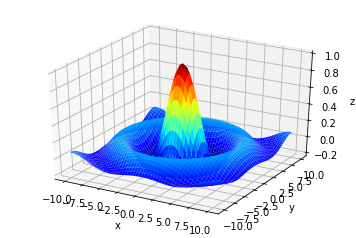

In [387]:
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## 线性插值

数据导入

In [467]:
data = np.genfromtxt("C:\Users\d\map/JANAF_CH4.txt", 
                  delimiter="\t", # TAB 分隔
                  skip_header=1,     # 忽略首行
                  names=True,     # 读入属性
                  missing_values="INFINITE",  # 缺失值
                  filling_values=np.inf)      # 填充缺失值

for row in data[:7]:
    print "{}\t{}".format(row['TK'], row['Cp'])
print "...\t..."

0.0	0.0
100.0	33.258
200.0	33.473
250.0	34.216
298.15	35.639
300.0	35.708
350.0	37.874
...	...


In [3]:
p = plt.plot(data['TK'], data['Cp'], 'kx')
t = plt.title("JANAF data for Methane $CH_4$")
a = plt.axis([0, 6000, 30, 120])
x = plt.xlabel("Temperature (K)")
y = plt.ylabel(r"$C_p$ ($\frac{kJ}{kg K}$)")

NameError: name 'plt' is not defined

In [451]:
from scipy.interpolate import interp1d

默认为线性差值
nearest 最近邻插值
zero 0阶插值
linear 线性插值
quadratic 二次插值
cubic 三次插值
4,5,6,7 更高阶插值

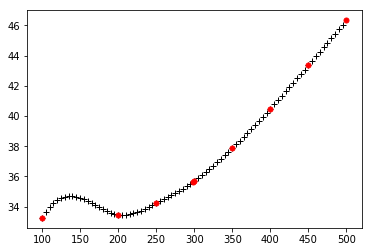

In [462]:
T = np.arange(100,500,5)
ch4_cp = interp1d(data['TK'], data['Cp'],kind=3) 
plt.plot(T, ch4_cp(T), "+k")
p = plt.plot(data['TK'][1:10], data['Cp'][1:10], 'ro', markersize=5)

### 径向函数插值

In [2]:
from scipy.interpolate.rbf import Rbf
plt.style.use('ggplot')
with plt.style.context(('dark_background')):
    subplot(3, 1, 1)
    cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")
    plt.plot(data['TK'], data['Cp'], 'k+')
    p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')
    subplot(3, 1, 2)
    cp_rbf = Rbf(data['TK'], data['Cp'], function = "gaussian")
    plt.plot(data['TK'], data['Cp'], 'k+')
    p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')
    subplot(3, 1, 3)
    cp_rbf = Rbf(data['TK'], data['Cp'], function = "inverse_multiquadric")
    plt.plot(data['TK'], data['Cp'], 'k+')
    p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

NameError: name 'plt' is not defined

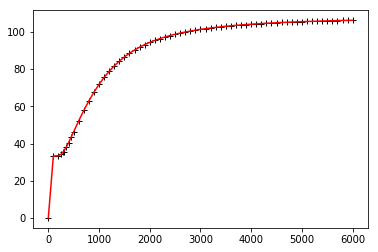

In [476]:
cp_rbf = Rbf(data['TK'], data['Cp'], function = "gaussian")
plt.plot(data['TK'], data['Cp'], 'k+')
p = plt.plot(data['TK'], cp_rbf(data['TK']), 'r-')

In [6]:
from mpl_toolkits.mplot3d import Axes3D
x, y = np.mgrid[-np.pi/2:np.pi/2:5j, -np.pi/2:np.pi/2:5j]
z = np.cos(np.sqrt(x**2 + y**2))
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.scatter(x,y,z)

NameError: name 'np' is not defined

In [ ]:
zz = Rbf(x, y, z)
xx, yy = np.mgrid[-np.pi/2:np.pi/2:50j, -np.pi/2:np.pi/2:50j]
fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection="3d")
ax.plot_surface(xx,yy,zz(xx,yy),rstride=1, cstride=1, cmap=plt.cm.jet)

### 概率统计方法

In [5]:
heights = array([1.46, 1.79, 2.01, 1.75, 1.56, 1.69, 1.88, 1.76, 1.88, 1.78])
print 'mean, ', heights.mean()
print 'min, ', heights.min()
print 'max, ', heights.max()
print 'standard deviation, ', heights.std()

NameError: name 'array' is not defined

In [ ]:
import scipy.stats.stats as st
print 'mode, ', st.mode(heights)           # 众数及其出现次数
print 'skewness, ', st.skew(heights)       # 偏度
print 'kurtosis, ', st.kurtosis(heights)   # 峰度
print 'and so many more...'

In [4]:
from scipy.stats import norm
x_norm = norm.rvs(size=500)
type(x_norm)
h = hist(x_norm)
print 'counts, ', h[0]
print 'bin centers', h[1]

NameError: name 'hist' is not defined

In [3]:
h = hist(x_norm, normed=True, bins=20)

NameError: name 'hist' is not defined

In [2]:
x_mean, x_std = norm.fit(x_norm)

print 'mean, ', x_mean
print 'x_std, ', x_std
h = hist(x_norm, normed=True, bins=20)

x = linspace(-3,3,50)
p = plot(x, norm.pdf(x), 'r-')

NameError: name 'norm' is not defined

95.45% of the values lie between -2 and 2


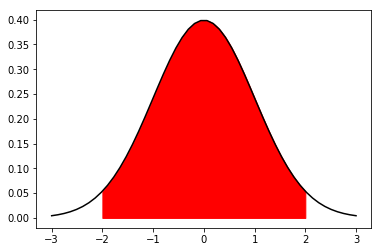

In [494]:
from scipy.integrate import trapz 
x1 = linspace(-2,2,108)
p = trapz(norm.pdf(x1), x1) 
print '{:.2%} of the values lie between -2 and 2'.format(p)

fill_between(x1, norm.pdf(x1), color = 'red')
plot(x, norm.pdf(x), 'k-')

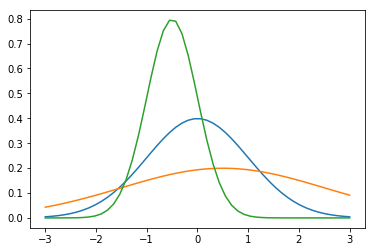

In [495]:
p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm.pdf(x, loc=0.5, scale=2))
p = plot(x, norm.pdf(x, loc=-0.5, scale=.5))

其他其他

### 曲线拟合

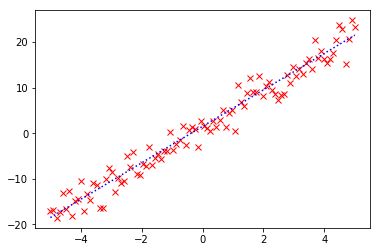

In [496]:
from numpy import polyfit, poly1d
x = np.linspace(-5, 5, 100)
y = 4 * x + 1.5
noise_y = y + np.random.randn(y.shape[-1]) * 2.5
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, y, 'b:')

In [498]:
coeff = polyfit(x, noise_y, 1)
print coeff

[3.97 1.39]


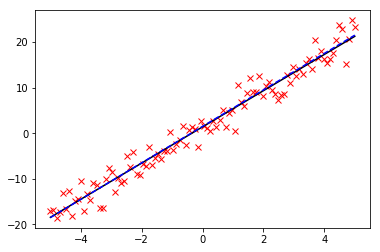

In [499]:
p = plt.plot(x, noise_y, 'rx')
p = plt.plot(x, coeff[0] * x + coeff[1], 'k-')
p = plt.plot(x, y, 'b--')

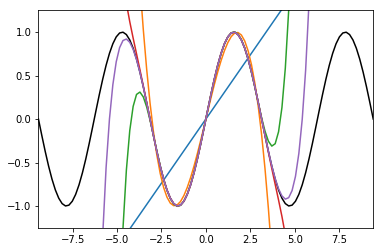

In [500]:
x = np.linspace(-np.pi,np.pi,100)
y = np.sin(x)
y1 = poly1d(polyfit(x,y,1))
y3 = poly1d(polyfit(x,y,3))
y5 = poly1d(polyfit(x,y,5))
y7 = poly1d(polyfit(x,y,7))
y9 = poly1d(polyfit(x,y,9))
x = np.linspace(-3 * np.pi,3 * np.pi,100)

p = plt.plot(x, np.sin(x), 'k')
p = plt.plot(x, y1(x))
p = plt.plot(x, y3(x))
p = plt.plot(x, y5(x))
p = plt.plot(x, y7(x))
p = plt.plot(x, y9(x))

a = plt.axis([-3 * np.pi, 3 * np.pi, -1.25, 1.25])

### 符号积分

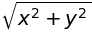

In [503]:
from sympy import init_printing
from sympy import symbols, integrate
import sympy
init_printing()
x, y = symbols('x y')
sympy.sqrt(x**2 + y ** 2)


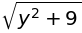

In [504]:
z = sympy.sqrt(x ** 2 + y ** 2)
z.subs(x, 3)

In [515]:
from sympy.abc import theta
y = sympy.sin(theta) ** 2
Y = integrate(y)
Y
import numpy as np
#np.set_printoptions(precision=3)

#Y.subs(theta, np.pi) - Y.subs(theta, 0)

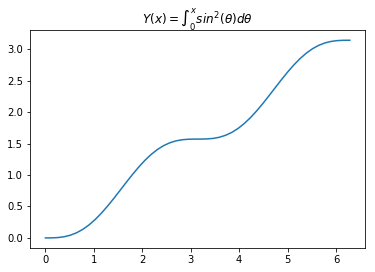

In [517]:
Y_raw = lambda x: integrate(y, (theta, 0, x))
Y = np.vectorize(Y_raw)
x = np.linspace(0, 2 * np.pi)
p = plt.plot(x, Y(x))
t = plt.title(r'$Y(x) = \int_0^x sin^2(\theta) d\theta$')

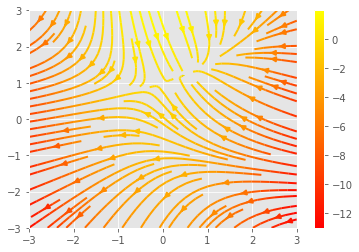

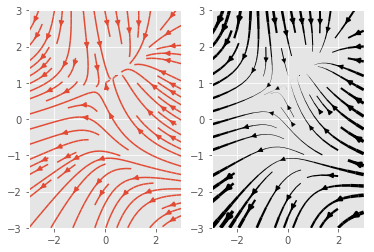

In [525]:
import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
plt.colorbar()

f, (ax1, ax2) = plt.subplots(ncols=2)
ax1.streamplot(X, Y, U, V, density=[0.5, 1])

lw = 5*speed/speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)

plt.show()
from pylab import figure, show, rand
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=rand(2)*10, width=rand(), height=rand(), angle=rand()*360)
        for i in range(NUM)]

fig = figure()
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rand())
    e.set_facecolor(rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

show()

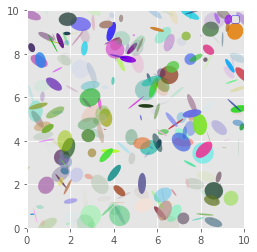

In [528]:
from pylab import figure, show, rand
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=rand(2)*10, width=rand(), height=rand(), angle=rand()*360)
        for i in range(NUM)]

fig = figure()
ax = fig.add_subplot(111, aspect='equal')
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(rand())
    e.set_facecolor(rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
show()

In [532]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('ecg.npy')
price_data = np.load(datafile).view(np.recarray)
price_data = price_data[-250:] # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close)/price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

IOError: [Errno 2] No such file or directory: u'C:\\Users\\d\\Anaconda2\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\ecg.npy'

C:\Users\d\Anaconda2\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


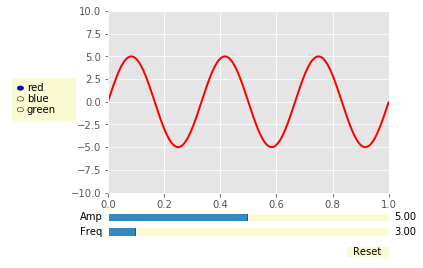

In [533]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t,s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
axamp  = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], axisbg=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)
def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()